In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
# specifically for cnn

from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D
from keras.utils import np_utils
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.vgg16 import VGG16

import skimage.io as io

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
#from zipfile import ZipFile
#with ZipFile('/content/gdrive/My Drive/ML/Data_set/Plant seedings/test.zip', 'r') as z:
#    z.extractall('/content/gdrive/My Drive/ML/Data_set/Plant seedings/test_set')
    #z.printdir()
#    z.close()

In [0]:
path = '/content/gdrive/My Drive/ML/Data_set/Plant seedings/train'
dir_name  = os.listdir(path)
print(dir_name)

['Sugar beet', 'Common wheat', 'Cleavers', 'Loose Silky-bent', 'Common Chickweed', 'Maize', 'Scentless Mayweed', 'Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse', 'Black-grass', 'Charlock']


In [0]:
##Till this common step
X = []
Y = []
def image_preprocessing(image):
  #img_resize = cv2.resize(cv2.imread(image),(100,100))
  blurr = cv2.GaussianBlur(image,(5,5),0)
  hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
#GREEN PARAMETERS
  lower = (25,40,50)
  upper = (75,255,255)
  hsv_thres = cv2.inRange(hsv,lower,upper)
  struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
#struc = cv2.getStructuringElement(cv2.MORPH_RECT,(,3))
  mask = cv2.morphologyEx(hsv_thres,cv2.MORPH_CLOSE,struc)
  boolean = mask>0
  new = np.zeros_like(image,np.uint8)
  new[boolean] = image[boolean]
  return new

In [0]:
print("On resizing faced issue in Loose Silky-bent, wr the shape chaged from 100,100,3 to 100,100,4. So made condition to ignore that case alone")

On resizing faced issue in Loose Silky-bent, wr the shape chaged from 100,100,3 to 100,100,4. So made condition to ignore that case alone


In [0]:
print("Data without masking")

Data without masking


In [0]:
#Data without masking
c=0
for i in dir_name:
  if i == 'Black-grass':
    B = os.listdir(path+'/' + i)
    for k in B:
      #print((path+'/' + i+ '/'+ k))
      img = io.imread(path+'/' + i+ '/'+ k)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append((img_resize))#X.append(image_preprocessing(img_resize))
      Y.append(0)
  elif i =='Cleavers':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img1)
      X.append((img_resize))#X.append(image_preprocessing(img_resize))
      Y.append(1)
  elif i =='Common Chickweed':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append((img_resize))#X.append(image_preprocessing(img_resize))
      Y.append(2)
  elif i =='Common wheat':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append((img_resize))#X.append(image_preprocessing(img_resize))
      Y.append(3)
  elif i =='Charlock':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(img_resize)#X.append(image_preprocessing(img_resize))
      Y.append(4)
  elif i =='Loose Silky-bent':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      if img_resize.shape[2] != 4:
        #print("count ", c + 1)
        X.append(img_resize)#X.append(image_preprocessing(img_resize))
        Y.append(5)
  elif i =='Fat Hen':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(img_resize)#X.append(image_preprocessing(img_resize))
      Y.append(6)
  elif i =='Maize':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(img_resize)#X.append(image_preprocessing(img_resize))
      Y.append(7)
  elif i =='Scentless Mayweed':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(img_resize)#X.append(image_preprocessing(img_resize))
      Y.append(8)
  elif i =='Shepherds Purse':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(img_resize)#X.append(image_preprocessing(img_resize))
      Y.append(9)
  elif i =='Small-flowered Cranesbill':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img)
      X.append(img_resize)#X.append(image_preprocessing(img_resize))
      Y.append(10)
  elif i =='Sugar beet':
    D = os.listdir(path+'/' + i)
    for j in D:
      imgj = io.imread(path+'/' + i+ '/'+ j)
      #print(path+'/' + i+ '/'+ j)
      #print(imgj)
      #print(imgj.shape)
      img_resize = cv2.resize(imgj,(100,100))
      #print(img2)
      X.append(img_resize)#X.append(image_preprocessing(img_resize))
      Y.append(11)

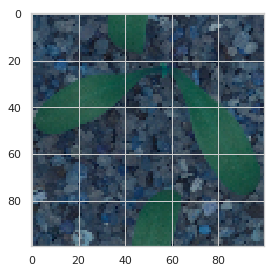

In [0]:
cvc_img = cv2.imread('/content/gdrive/My Drive/ML/Data_set/Plant seedings/train/Sugar beet/00acffa82.png',cv2.IMREAD_COLOR)
imga_resize = cv2.resize(cvc_img,(100,100))
#h = image_preprocessing(imga_resize)
#h = imga_resize
plt.imshow(imga_resize)
plt.show()

In [0]:
x = np.asarray(X)
y = np.asarray(Y)

x = x.astype('float32')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 15,stratify=y)

X_train /= 255
X_test /= 255



In [0]:
np.unique(y_test)
np.unique(y_train)

y_train.shape
y_train = np_utils.to_categorical(y_train, 12)
y_test = np_utils.to_categorical(y_test, 12)

y_train.shape

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

(3796,)

(3796, 12)

In [0]:
X_train.shape
X_test.shape

(3796, 100, 100, 3)

(949, 100, 100, 3)

In [0]:
print("Model with Relu")

Model with Relu


In [0]:
TRAIN = True
BATCH_SIZE = 50
EPOCHS = 30

In [0]:
model = Sequential()

    # 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(100, 100, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

    # 2nd Conv Layer
model.add(Convolution2D(64, 3, 3))
    # Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(BatchNormalization())


    # 3rd Conv Layer
model.add(Convolution2D(128, 3, 3))
    # Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(BatchNormalization())


    # 3rd Conv Layer
model.add(Convolution2D(256, 3, 3))
    # Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(BatchNormalization())



    # Fully Connected Layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(Dense(1024))
model.add(Activation('relu'))
model.add(BatchNormalization())


    # Prediction Layer
model.add(Dense(12))
model.add(Activation('softmax'))

    # Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    

    # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]
model.fit(X_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
          validation_data=(X_test, y_test), callbacks=callback_list)

Train on 3796 samples, validate on 949 samples
Epoch 1/30
3796/3796 [==============================] - 8s 2ms/step - loss: 1.2228 - acc: 0.6291 - val_loss: 3.0063 - val_acc: 0.4183
Epoch 2/30
3796/3796 [==============================] - 6s 2ms/step - loss: 0.4529 - acc: 0.8556 - val_loss: 0.9281 - val_acc: 0.7492
Epoch 3/30
3796/3796 [==============================] - 6s 2ms/step - loss: 0.2912 - acc: 0.9033 - val_loss: 0.8560 - val_acc: 0.7703
Epoch 4/30
3796/3796 [==============================] - 6s 2ms/step - loss: 0.2030 - acc: 0.9365 - val_loss: 1.9433 - val_acc: 0.6027
Epoch 5/30
3796/3796 [==============================] - 6s 2ms/step - loss: 0.1938 - acc: 0.9362 - val_loss: 1.5370 - val_acc: 0.6607
Epoch 6/30
3796/3796 [==============================] - 6s 2ms/step - loss: 0.1395 - acc: 0.9510 - val_loss: 0.7981 - val_acc: 0.8177
Epoch 7/30
3796/3796 [==============================] - 6s 2ms/step - loss: 0.0697 - acc: 0.9797 - val_loss: 1.2884 - val_acc: 0.7102
Epoch 8/30
3796

In [0]:
print("Model with leaky relu , Data generator - Image Augmentation")

Data generator - Image Augumentation


In [0]:
TRAIN = True
BATCH_SIZE = 50
EPOCHS = 40
from keras.layers import LeakyReLU

In [0]:
model = Sequential()

    # 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(100, 100, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

    # 2nd Conv Layer
model.add(Convolution2D(64, 3, 3))
    # Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model.add(Dropout(0.25))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())


    # 3rd Conv Layer
model.add(Convolution2D(128, 3, 3))
    # Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model.add(Dropout(0.25))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())


    # 3rd Conv Layer
model.add(Convolution2D(256, 3, 3))
    # Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model.add(Dropout(0.25))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())



    # Fully Connected Layer
model.add(Flatten())
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())


model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())


    # Prediction Layer
model.add(Dense(12))
model.add(Activation('softmax'))

    # Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    

    # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=360,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True,
    zoom_range=0.3,)  # randomly flip images

# Prepare the generator
datagen.fit(X_train)


In [0]:
TRAIN= True

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
if TRAIN:
    model.fit_generator(datagen.flow(X_train, y_train,
                         batch_size=BATCH_SIZE),
                         samples_per_epoch=X_train.shape[0],
                         nb_epoch=EPOCHS,
                         validation_data=(X_test, y_test), callbacks=callback_list)
    model.save('./cnn_augment.h5')
else:
    print('Loading pretrained model...')
    model = keras.models.load_model('./cnn_augment.h5')
    print('Model Loaded.')

Epoch 1/30
75/75 [==============================] - 11s 146ms/step - loss: 1.6846 - acc: 0.5133 - val_loss: 2.9766 - val_acc: 0.4816
Epoch 2/30
75/75 [==============================] - 9s 121ms/step - loss: 0.9334 - acc: 0.6998 - val_loss: 0.9394 - val_acc: 0.7408
Epoch 3/30
75/75 [==============================] - 9s 126ms/step - loss: 0.7051 - acc: 0.7732 - val_loss: 0.6049 - val_acc: 0.8145
Epoch 4/30
75/75 [==============================] - 9s 124ms/step - loss: 0.5777 - acc: 0.8135 - val_loss: 0.9045 - val_acc: 0.7271
Epoch 5/30
75/75 [==============================] - 9s 124ms/step - loss: 0.5307 - acc: 0.8286 - val_loss: 1.0879 - val_acc: 0.6649
Epoch 6/30
75/75 [==============================] - 9s 125ms/step - loss: 0.4527 - acc: 0.8548 - val_loss: 2.1231 - val_acc: 0.5153
Epoch 7/30
75/75 [==============================] - 9s 123ms/step - loss: 0.4043 - acc: 0.8697 - val_loss: 1.9340 - val_acc: 0.5448
Epoch 8/30
75/75 [==============================] - 9s 122ms/step - loss: 0

In [0]:
print("image Accuracy went till 93, 94%")

image Accuracy went till 93, 94%


In [0]:
print("Model with leaky relu")

Model with leaky relu


In [0]:
TRAIN = True
BATCH_SIZE = 50
EPOCHS = 40
from keras.layers import LeakyReLU

In [0]:
model = Sequential()

    # 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(100, 100, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

    # 2nd Conv Layer
model.add(Convolution2D(64, 3, 3))
    # Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model.add(Dropout(0.25))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())


    # 3rd Conv Layer
model.add(Convolution2D(128, 3, 3))
    # Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model.add(Dropout(0.25))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())


    # 3rd Conv Layer
model.add(Convolution2D(256, 3, 3))
    # Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model.add(Dropout(0.25))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())



    # Fully Connected Layer
model.add(Flatten())
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())


model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())


    # Prediction Layer
model.add(Dense(12))
model.add(Activation('softmax'))

    # Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    

    # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

model.fit(X_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
          validation_data=(X_test, y_test), callbacks=callback_list)

Train on 3796 samples, validate on 949 samples
Epoch 1/40
3796/3796 [==============================] - 8s 2ms/step - loss: 1.3057 - acc: 0.6236 - val_loss: 1.6451 - val_acc: 0.6017
Epoch 2/40
3796/3796 [==============================] - 6s 2ms/step - loss: 0.4713 - acc: 0.8535 - val_loss: 0.5117 - val_acc: 0.8346
Epoch 3/40
3796/3796 [==============================] - 6s 2ms/step - loss: 0.2820 - acc: 0.9099 - val_loss: 0.7526 - val_acc: 0.7703
Epoch 4/40
3796/3796 [==============================] - 6s 2ms/step - loss: 0.2270 - acc: 0.9278 - val_loss: 1.1931 - val_acc: 0.7376
Epoch 5/40
3796/3796 [==============================] - 6s 2ms/step - loss: 0.1350 - acc: 0.9557 - val_loss: 0.5060 - val_acc: 0.8641
Epoch 6/40
3796/3796 [==============================] - 6s 2ms/step - loss: 0.1020 - acc: 0.9671 - val_loss: 0.5818 - val_acc: 0.8525
Epoch 7/40
3796/3796 [==============================] - 6s 2ms/step - loss: 0.0940 - acc: 0.9697 - val_loss: 1.2359 - val_acc: 0.7345
Epoch 8/40
3796

In [0]:
print('Model Data Augmentation with Relu')

Model Data Augmentation with Relu


In [0]:
TRAIN = True
BATCH_SIZE = 50
EPOCHS = 30

In [0]:
model = Sequential()

    # 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(100, 100, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

    # 2nd Conv Layer
model.add(Convolution2D(64, 3, 3))
    # Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(BatchNormalization())


    # 3rd Conv Layer
model.add(Convolution2D(128, 3, 3))
    # Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(BatchNormalization())


    # 3rd Conv Layer
model.add(Convolution2D(256, 3, 3))
    # Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(BatchNormalization())



    # Fully Connected Layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(Dense(1024))
model.add(Activation('relu'))
model.add(BatchNormalization())


    # Prediction Layer
model.add(Dense(12))
model.add(Activation('softmax'))

    # Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    

    # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=360,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True,
    zoom_range=0.3,)  # randomly flip images

# Prepare the generator
datagen.fit(X_train)


In [0]:
TRAIN= True

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
if TRAIN:
    model.fit_generator(datagen.flow(X_train, y_train,
                         batch_size=BATCH_SIZE),
                         samples_per_epoch=X_train.shape[0],
                         nb_epoch=EPOCHS,
                         validation_data=(X_test, y_test), callbacks=callback_list)
    model.save('./cnn_augment.h5')
else:
    print('Loading pretrained model...')
    model = keras.models.load_model('./cnn_augment.h5')
    print('Model Loaded.')

Epoch 1/30
75/75 [==============================] - 12s 161ms/step - loss: 1.7297 - acc: 0.5029 - val_loss: 2.5714 - val_acc: 0.4615
Epoch 2/30
75/75 [==============================] - 9s 120ms/step - loss: 1.0311 - acc: 0.6699 - val_loss: 1.5501 - val_acc: 0.6523
Epoch 3/30
75/75 [==============================] - 9s 123ms/step - loss: 0.7651 - acc: 0.7558 - val_loss: 0.8771 - val_acc: 0.7208
Epoch 4/30
75/75 [==============================] - 9s 123ms/step - loss: 0.6222 - acc: 0.7995 - val_loss: 0.9439 - val_acc: 0.7334
Epoch 5/30
75/75 [==============================] - 9s 123ms/step - loss: 0.5237 - acc: 0.8254 - val_loss: 1.3886 - val_acc: 0.6839
Epoch 6/30
75/75 [==============================] - 9s 123ms/step - loss: 0.5124 - acc: 0.8286 - val_loss: 0.6126 - val_acc: 0.8272
Epoch 7/30
75/75 [==============================] - 9s 123ms/step - loss: 0.4269 - acc: 0.8631 - val_loss: 1.1361 - val_acc: 0.7102
Epoch 8/30
75/75 [==============================] - 9s 125ms/step - loss: 0

In [1]:
print("From all above models looks leaky relu with Image generator came upto 93 to 94% Accuracy")

From all above models looks leaky relu with Image generator came upto 93 to 94% Accuracy


In [2]:
print("Over all model with leaky relu and image generatore gave around 93 to 94%  validation Accuracy")

Over all model with leaky relu and image generatore gave around 93 to 94%  validation Accuracy
